<a href="https://colab.research.google.com/github/poorvi-sharma/ML-mini-projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

In [ ]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
house_df = pd.DataFrame(house_price_dataset.data, columns= house_price_dataset.feature_names)

In [ ]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
house_price_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
house_df.shape

(506, 13)

In [10]:
house_df['price'] = house_price_dataset.target

In [11]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#to check if any null value exists
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
#this dataset has no null value but to remove it if any dataset had it then we can do:
#house_df = house_df.dropna(how = 'any', axis = 0)

#to drop a column of a table if we wish we can use
#house_df.drop(['CRIM'], AXIS = 1)

In [13]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#CORRELATION ANALYSIS


In [14]:
correlation = house_df.corr()

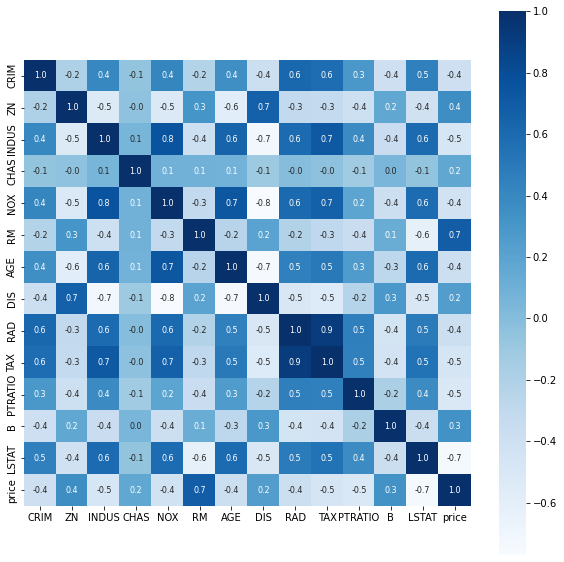

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square=True, fmt= '.1f', annot=True, annot_kws= {'size': 8}, cmap = 'Blues')

In [16]:
x = house_df.drop(['price'], axis=1)
y = house_df['price']

In [17]:
x.shape, y.shape

((506, 13), (506,))

In [18]:
print(y) #price

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [23]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
training_data_prediction = model.predict(X_train)

In [26]:
print(training_data_prediction)

[25.01156658 23.20086342 19.63206629 30.79723661 13.29598163 12.35655178
 21.17619058 11.52105413 13.48284934 23.29619143 16.67181245 11.9640623
 32.53526883 25.38737924 29.80188665 19.51269487 24.14966495 24.10079632
 30.6933436  19.14366521 33.53309203  3.93459665 41.11203484 24.48533152
 20.09948308 23.54618062 21.50057915 25.02443747 22.39275602 33.67942244
 25.49286716  8.07877994 17.45164918 10.02711469 20.30483806 12.97802751
 18.36662544 25.4320083  14.00655745 17.89557148 24.77620977 28.90131112
 17.27439484 23.1865498  12.62489379 11.32274928 27.4978866  19.49269776
 44.80229099 16.9529603  22.44602306 33.66680303 20.2706101  20.70205114
 20.98558754 21.63228494 27.05322369 33.11940621 25.61757987 32.73314444
 20.91920151 41.11899411 15.32086807  8.42394611 22.84480968 13.72210624
 28.60744627 17.09291577 26.76454185 39.14699941 34.90240572 35.55989745
 21.98217997 28.96612576 25.11129326 42.52704888 19.53053513 22.63970213
 17.14416523 27.37214688 33.68385271 25.77228001 26.

In [27]:
R_square_score = metrics.r2_score(Y_train, training_data_prediction)
Mean_absolute_error = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R_squared_error :", R_square_score)
print('Mean absolute_error :',Mean_absolute_error)

R_squared_error : 0.7285831776605591
Mean absolute_error : 3.3844575399167987


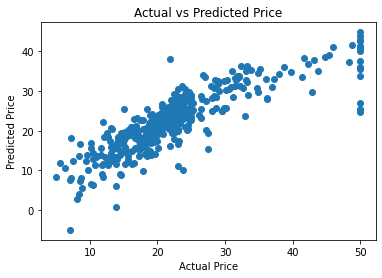

In [28]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Price")
plt.show()

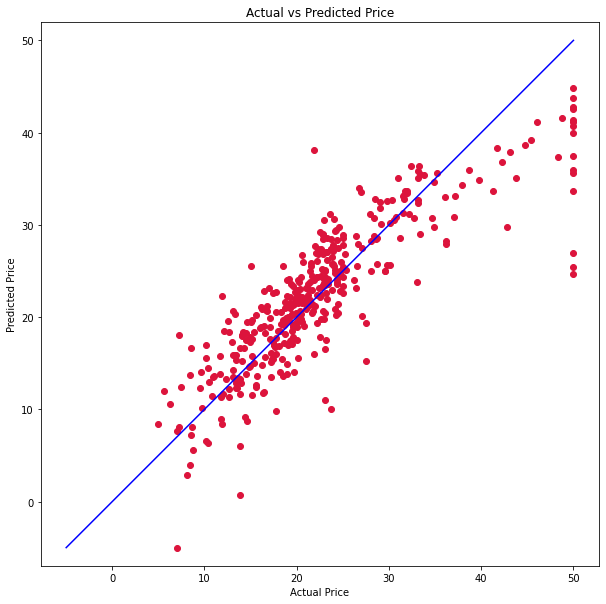

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(Y_train, training_data_prediction, c = 'crimson')
p1 = max(max(training_data_prediction), max(Y_train))
p2 = min(min(training_data_prediction), min(Y_train))
plt.plot([p1,p2], [p1,p2], 'b-')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Price")
plt.axis('equal')
plt.show()